In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
/content/drive/MyDrive/csv_data/npz파일/data_celeba.npz

In [3]:
data = np.load('/content/drive/MyDrive/csv_data/npz파일/data_celeba.npz')

In [4]:
X=data[list(data)[0]]
y=data[list(data)[1]]

In [5]:
np.shape(X)

(2000, 72, 59, 3)

In [18]:
y_gender=y[:,0]
y_smile=y[:,1]

---x값---


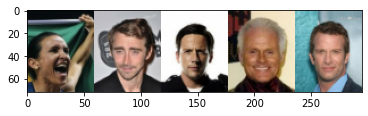

---y value----
[0 1 1 1 1] [0 1 0 1 1]


In [19]:
print('---x값---')
plt.imshow(np.hstack(X[:5]))
plt.show()

print('---y value----')
print(y_gender[:5],y_smile[:5])


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X,y_gender,
                                                  test_size=0.3,random_state=777)
print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(1400, 72, 59, 3) 1400
(600, 72, 59, 3) 600


In [23]:
# 과연 y데이터의 분할은 편향없이 잘 되었나를 확인해야함
# => 훈련과 테스트자료에 0과1의 값의 분포가 비슷한가 ?
# 결과물은 트레이닝의 y의 0값이 몇개 값 1의 값이 몇개인
x = 0 
y = 0
for i in y_val:
  if i == 0 :
    x +=1
  else:
    y +=1

In [24]:
x,y

(280, 320)

In [25]:
x = 0 
y = 0
for i in y_train:
  if i == 0 :
    x +=1
  else:
    y +=1

In [26]:
x,y

(726, 674)

In [33]:
# 
import collections, numpy
print(collections.Counter(y_train))
print(collections.Counter(y_val))

Counter({0: 726, 1: 674})
Counter({1: 320, 0: 280})


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [44]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = 3,padding='same',activation='relu',input_shape = (72, 59, 3)))
model.add(Conv2D(filters=32, kernel_size = 3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2,padding='same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [45]:
model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

In [55]:
history = model.fit(x_train, y_train,
                    epochs = 4,
                    batch_size = 32,
                    validation_data = (x_val, y_val))

Epoch 1/4
44/44 [==============================] - 41s 944ms/step - loss: 6.9286e-04 - acc: 1.0000 - val_loss: 0.4930 - val_acc: 0.8983
Epoch 2/4
44/44 [==============================] - 42s 950ms/step - loss: 6.5277e-04 - acc: 1.0000 - val_loss: 0.4984 - val_acc: 0.8967
Epoch 3/4
44/44 [==============================] - 43s 974ms/step - loss: 5.5280e-04 - acc: 1.0000 - val_loss: 0.4999 - val_acc: 0.8967
Epoch 4/4
44/44 [==============================] - 42s 959ms/step - loss: 5.0948e-04 - acc: 1.0000 - val_loss: 0.5195 - val_acc: 0.8950


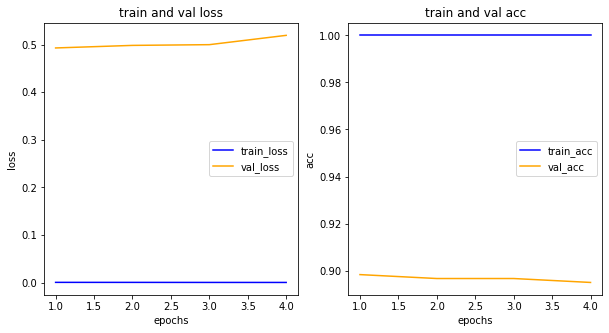

In [56]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

---x테스트---


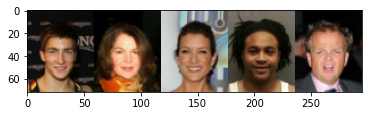

---y test value----
[1 0 0 1 1]
---y 예측값 value
1 male
0 female
0 female
0 female
1 male


In [57]:
# 테스트데이터셋

y_pred=model.predict(x_val[:5])

print('---x테스트---')
plt.imshow(np.hstack(x_val[:5]))
plt.show()

print('---y test value----')
print(y_val[:5])

class_names=['female','male']
print('---y 예측값 value')
for i in y_pred:
  print(np.argmax(i),class_names[np.argmax(i)])


In [48]:
# y_val 또는 y_test 사진셋이 아닌 한장의 사진으로 보겠습니다.
# model.predict(x_val[0]) 에러
model.predict(x_val[0:1]) # 텐서 모델은 4개의 dim이어야 함.
np.shape(x_val[0]),np.shape(x_val[0:1])

((72, 59, 3), (1, 72, 59, 3))

In [59]:
# 사진 불러와서 예측
# 1 리사이즈 (72,59,3)
# 2. 스케일링 0~1 사이값 제공된 npz의 스케일링 방법을 모르기 때문에 이부분은 스케일링 한 사람만 정확하게 할 수 있음.
     # > 여기서는 255로 나눈값
from PIL import  Image
img = Image.open('이미지1.jpg')
img = img.resize((59,72)) ## PIL에서는 너비 높이 텐서에서는 높이 너비
print(np.shape(img))
imgArr=np.array(img)/255
print(np.shape(imgArr))

newX=imgArr.reshape(1,72,59,3)
np.shape(newX) 

class_names[np.argmax(model.predict(newX))]

(72, 59, 3)
(72, 59, 3)


'male'

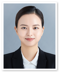

In [58]:
img

In [61]:
## 이자료는 과적합 해소도 해야하고 모델 잘 되면 
# model.save해서 h5로 갖고 다녀야함
model.save('얼굴성별epoch-4.h5')